## Week04, Precision Recall Curves

ISM6136

&copy; 2023 Dr. Tim Smith

---

# Exploring the Tradeoff between Precision and Recall

In this notebook we will explore the tradeoff between precision and recall, using the precision-recall curve. We will also explore the tradeoff between precision and recall using the Precision Recall curve.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay


np.random.seed(0)


In [2]:
df = pd.read_csv('./data/data-classification.csv')
df.head()

,feature1,feature2,feature3,feature4,target
0,394.62,blue,-3.535,13.0,NaN
1,656.93,red,-8.031,2.0,no-sale
2,464.11,blue,41.266,22.0,NaN
3,NaN,green,-114.846,-18.0,sale
4,495.14,Red,-108.936,-17.0,no-sale


In [3]:
df = df[['feature3', 'target']]
df = df.dropna()
print(df['target'].unique())
df = pd.get_dummies(
    df,
    drop_first=True,
)
df.head()

['no-sale' 'sale']


,feature3,target_sale
1,-8.031,False
3,-114.846,True
4,-108.936,False
6,-131.623,False
7,21.656,True


In [4]:
# fit logistic regression model to df data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('target_sale', axis=1)
y = df['target_sale']

X


,feature3
1,-8.031
3,-114.846
4,-108.936
6,-131.623
7,21.656
...,...
93,-67.311
95,-137.895
96,3.141
98,81.511


In [5]:
y

1     False
3      True
4     False
6     False
7      True
      ...  
93    False
95    False
96     True
98     True
99     True
Name: target_sale, Length: 81, dtype: bool

In [6]:
model = LogisticRegression().fit(X, y)
model.predict_proba(X)

array([[0.27146778, 0.72853222],
       [0.89937268, 0.10062732],
       [0.88230767, 0.11769233],
       [0.93639497, 0.06360503],
       [0.13350728, 0.86649272],
       [0.32504616, 0.67495384],
       [0.35085407, 0.64914593],
       [0.48178209, 0.51821791],
       [0.80828664, 0.19171336],
       [0.86109815, 0.13890185],
       [0.08293191, 0.91706809],
       [0.30880758, 0.69119242],
       [0.27780244, 0.72219756],
       [0.32120104, 0.67879896],
       [0.01015546, 0.98984454],
       [0.68626579, 0.31373421],
       [0.89848349, 0.10151651],
       [0.79775809, 0.20224191],
       [0.66438269, 0.33561731],
       [0.26871152, 0.73128848],
       [0.05599705, 0.94400295],
       [0.95567942, 0.04432058],
       [0.90596944, 0.09403056],
       [0.85971188, 0.14028812],
       [0.09430069, 0.90569931],
       [0.1886232 , 0.8113768 ],
       [0.24822871, 0.75177129],
       [0.357126  , 0.642874  ],
       [0.08115095, 0.91884905],
       [0.0788565 , 0.9211435 ],
       [0.

In [7]:
model.predict_proba(X)[:,0]

array([0.27146778, 0.89937268, 0.88230767, 0.93639497, 0.13350728,
       0.32504616, 0.35085407, 0.48178209, 0.80828664, 0.86109815,
       0.08293191, 0.30880758, 0.27780244, 0.32120104, 0.01015546,
       0.68626579, 0.89848349, 0.79775809, 0.66438269, 0.26871152,
       0.05599705, 0.95567942, 0.90596944, 0.85971188, 0.09430069,
       0.1886232 , 0.24822871, 0.357126  , 0.08115095, 0.0788565 ,
       0.13449109, 0.89368949, 0.02025722, 0.1049181 , 0.44228991,
       0.8211388 , 0.45670162, 0.17289196, 0.18825925, 0.38886319,
       0.7565718 , 0.1874922 , 0.86893227, 0.58671475, 0.53065503,
       0.40290582, 0.09704931, 0.27117372, 0.49433508, 0.78838137,
       0.00973721, 0.57613088, 0.1247621 , 0.05821031, 0.7610415 ,
       0.85648461, 0.59138093, 0.63871411, 0.15727623, 0.85847314,
       0.27658063, 0.18601034, 0.11267686, 0.89950721, 0.53959415,
       0.0348202 , 0.07037574, 0.10260002, 0.03723048, 0.81725727,
       0.43723302, 0.046603  , 0.07161569, 0.08886973, 0.20959

In [8]:
#print(X.shape)
#print((X['feature1'].values))
#print((X['feature1'].values.reshape(-1, 1)))
df['y_score'] = model.predict_proba(X)[:,1]

In [9]:
df.head(30)

,feature3,target_sale,y_score
1,-8.031,False,0.728532
3,-114.846,True,0.100627
4,-108.936,False,0.117692
6,-131.623,False,0.063605
7,21.656,True,0.866493
9,-16.654,True,0.674954
11,-20.533,True,0.649146
12,-38.766,True,0.518218
13,-89.588,True,0.191713
14,-102.548,False,0.138902


In [10]:
col_names = []
for i in range(0, 110, 10):
    col_name = f"y_pred_{i:02d}"
    df[col_name] = df['y_score'].apply(lambda x: 1 if x >= i/100 else 0)
    col_names += [col_name]

In [11]:
df

,feature3,target_sale,y_score,y_pred_00,y_pred_10,y_pred_20,y_pred_30,y_pred_40,y_pred_50,y_pred_60,y_pred_70,y_pred_80,y_pred_90,y_pred_100
1,-8.031,False,0.728532,1,1,1,1,1,1,1,1,0,0,0
3,-114.846,True,0.100627,1,1,0,0,0,0,0,0,0,0,0
4,-108.936,False,0.117692,1,1,0,0,0,0,0,0,0,0,0
6,-131.623,False,0.063605,1,0,0,0,0,0,0,0,0,0,0
7,21.656,True,0.866493,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-67.311,False,0.315132,1,1,1,1,0,0,0,0,0,0,0
95,-137.895,False,0.053357,1,0,0,0,0,0,0,0,0,0,0
96,3.141,True,0.789103,1,1,1,1,1,1,1,1,0,0,0
98,81.511,True,0.974688,1,1,1,1,1,1,1,1,1,1,0


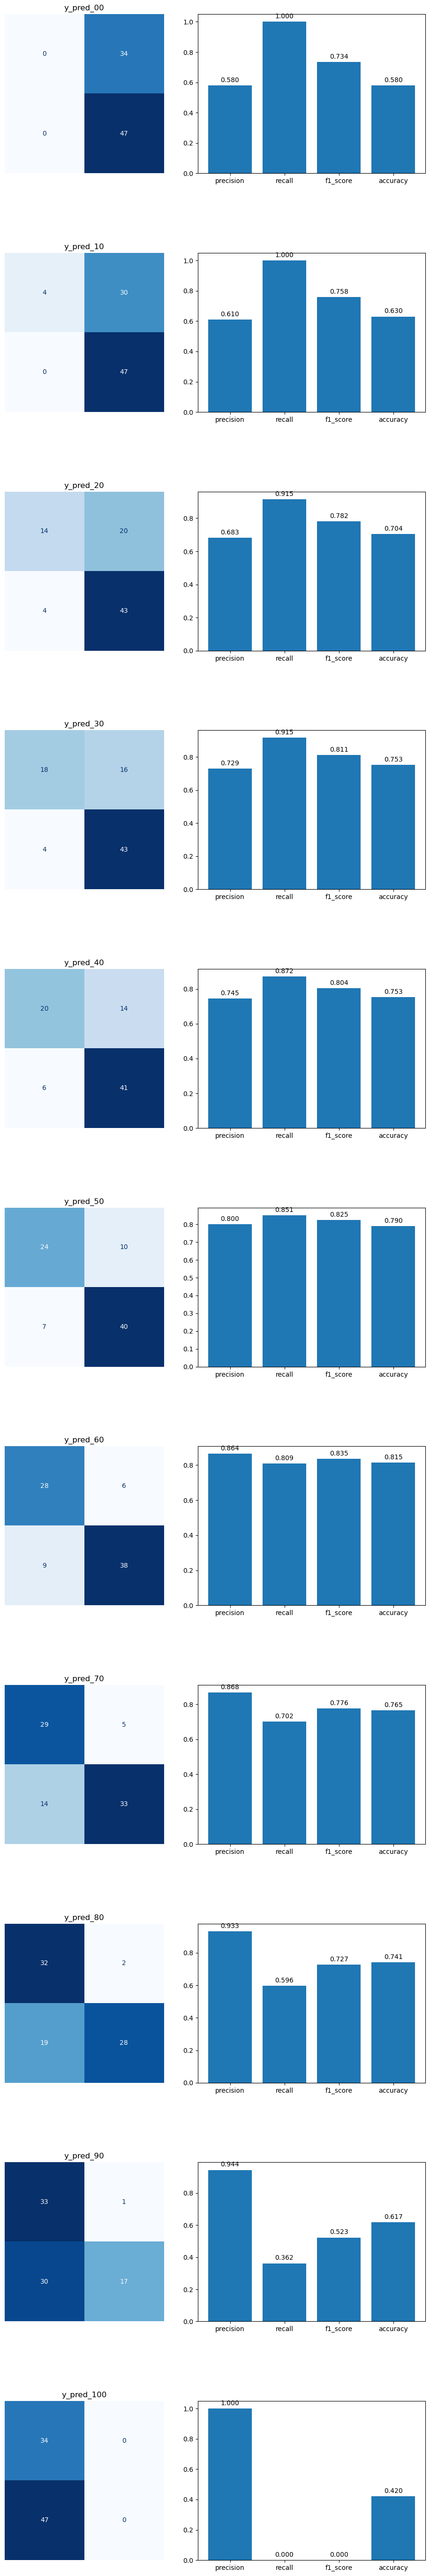

In [12]:
# display the confusion matrix

fig, ax = plt.subplots(len(col_names), 2, figsize=(10, 55))

row = 0
for col_name in col_names:
    ConfusionMatrixDisplay.from_predictions(
        df['target_sale'], 
        df[col_name],
        ax=ax[row][0],
        colorbar=False, 
        cmap=plt.cm.Blues,
        display_labels = None
    )
    ax[row][0].set_title(col_name)
    ax[row][0].axis('off')
    results = pd.DataFrame({
        'precision': precision_score(df['target_sale'], df[col_name], zero_division=1),
        'recall': recall_score(df['target_sale'], df[col_name]),
        'f1_score': f1_score(df['target_sale'], df[col_name]),
        'accuracy': accuracy_score(df['target_sale'] , df[col_name]),
        },
        index=[0]
    )
    pps = ax[row][1].bar(results.columns, results.values[0].round(3))
    x = np.arange(4) # the label locations
    width = 0.35 # the width of the bars
    for p in pps:
        height = p.get_height()
        ax[row][1].annotate(
            f'{height:0.3f}',
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom',
        )
    
    row += 1
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

[]

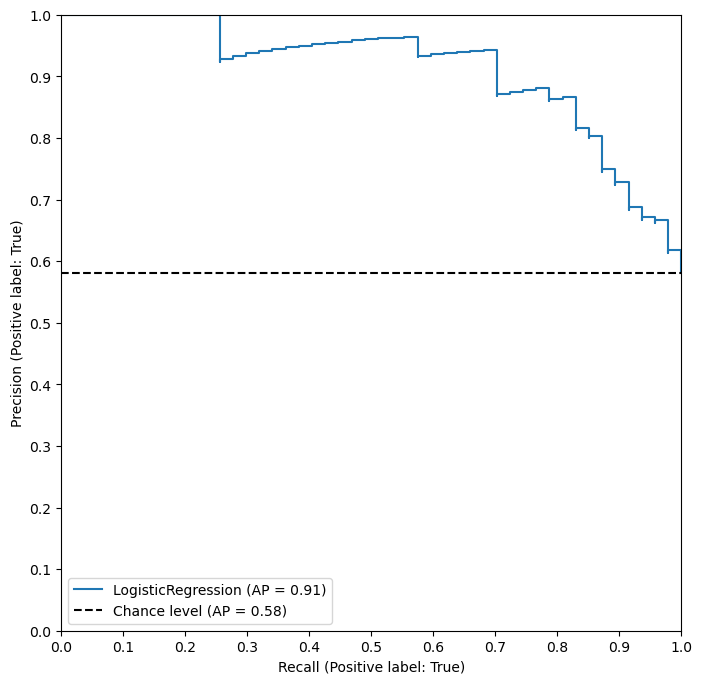

In [13]:
precision, recall, _ = precision_recall_curve(df['target_sale'], df['y_score'])

fig, ax = plt.subplots(figsize=(8, 8))
PrecisionRecallDisplay.from_estimator(model, X, y, plot_chance_level=True, ax=ax)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.xaxis.set_ticks(np.arange(0, 1.1, 0.1))
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))
plt.plot()